In [2]:
#effectuer des opérations sur ces tableaux.
import numpy as np
#la manipulation et l'analyse de données
import pandas as pd
# la création de graphiques
import matplotlib.pyplot as plt
%pip install seaborn
#visualisation des donnes
import seaborn as sns
#gerer les wanings
import warnings
import math
#entraîner un modèle de régression linéaire simple
import sklearn.linear_model
#la division d'un ensemble de données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
#régression linéaire simpl
from sklearn.linear_model import LinearRegression
#métriques d'évaluation de modèle pour mesurer la performance
from sklearn import metrics
#accès à une classe qui permet de mettre à l'échelle les caractéristiques (variables)
from sklearn.preprocessing import MinMaxScaler
# transformer et normaliser les données
from sklearn import preprocessing


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importationles donnees
house_data = pd.read_csv("data.csv")
#affichage data
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
#créer un DataFrame pandas à partir d'une structure de données house_data
data = pd.DataFrame(house_data)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [6]:
#exloration des data 
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
#affichage des dimensions des data
data.shape

(4600, 18)

In [8]:
#information data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
#transformet data floats en int64  et objects en string 
data['price']     = data['price'].astype('int64')
data['bedrooms']  = data['bedrooms'].astype('int64')
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors']    = data['floors'].astype('int64')
data['street']    = data['street'].astype('string')
data['city']      = data['city'].astype('string')
data['statezip']  = data['statezip'].astype('string')
data['country']   = data['country'].astype('string')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   string
 15  city           4600 non-null   string
 16  statezip       4600 non-null   string
 17  country        4600 non-null   string
dtypes: int64(13), object(1), str

In [11]:
# supprimer les colonne redoublonte
data.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [12]:
#les statistique des donnes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.0,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.0,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.0,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.0,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.0,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.0,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.0,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.0,2300.00,9410.0


In [13]:
#compter le nombre d'éléments dans la colonne "price"  
#de la structure de données data quiont une valeur égale à zéro.
(data.price == 0).sum() 

49

In [14]:
#remplacer les 0 par les nan
data['price'].replace(0, np.nan, inplace = True)

In [15]:
#compter le nombre de valeurs nulles (ou manquantes) dans chaque colonne du DataFrame
data.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [16]:
#supprimer les valeurs manquantes
data.dropna(inplace=True)
(data.price == 0).sum()

0

In [17]:
# afficher nv statistique
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.885959,563929.874935,7800.0,326264.0,465000.0,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.0,3.0,4.0,9.0
bathrooms,4551.0,1.782905,0.744431,0.0,1.0,2.0,2.0,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.0,1970.0,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.0,7680.0,10978.0,1074218.0
floors,4551.0,1.459240,0.552355,1.0,1.0,1.0,2.0,3.0
waterfront,4551.0,0.006592,0.080932,0.0,0.0,0.0,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.0,0.0,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.0,3.0,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.0,1590.0,2300.0,9410.0


In [18]:
#convertir la colonne 'date' du DataFrame data en objets de type datetime
data['date'] = pd.to_datetime(data['date'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [19]:
# ajouter la colonne year
data.insert(1, "year", data.date.dt.year)
data.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [20]:
#calculer le nombre d'éléments uniques dans chaque colonne
data.nunique(axis = 0)

date               70
year                1
price            1740
bedrooms           10
bathrooms           8
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

In [21]:
#calcule la corr
data.corr()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.210228,0.331917,0.445494,0.051347,0.138342,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,NaN,0.210228,1.000000,0.499640,0.596053,0.071138,0.154922,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,NaN,0.331917,0.499640,1.000000,0.706352,0.111565,0.466471,0.056590,0.196671,-0.118957,0.645209,0.268266,0.394298,-0.188182
sqft_living,NaN,0.445494,0.596053,0.706352,1.000000,0.213268,0.339348,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,NaN,0.051347,0.071138,0.111565,0.213268,1.000000,-0.005019,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,NaN,0.138342,0.154922,0.466471,0.339348,-0.005019,1.000000,0.010928,0.022631,-0.305362,0.516264,-0.252654,0.561159,-0.248916
waterfront,NaN,0.150083,-0.005521,0.056590,0.107758,0.017408,0.010928,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,NaN,0.242587,0.115080,0.196671,0.309343,0.072527,0.022631,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,NaN,0.038892,0.023018,-0.118957,-0.062529,0.000929,-0.305362,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483


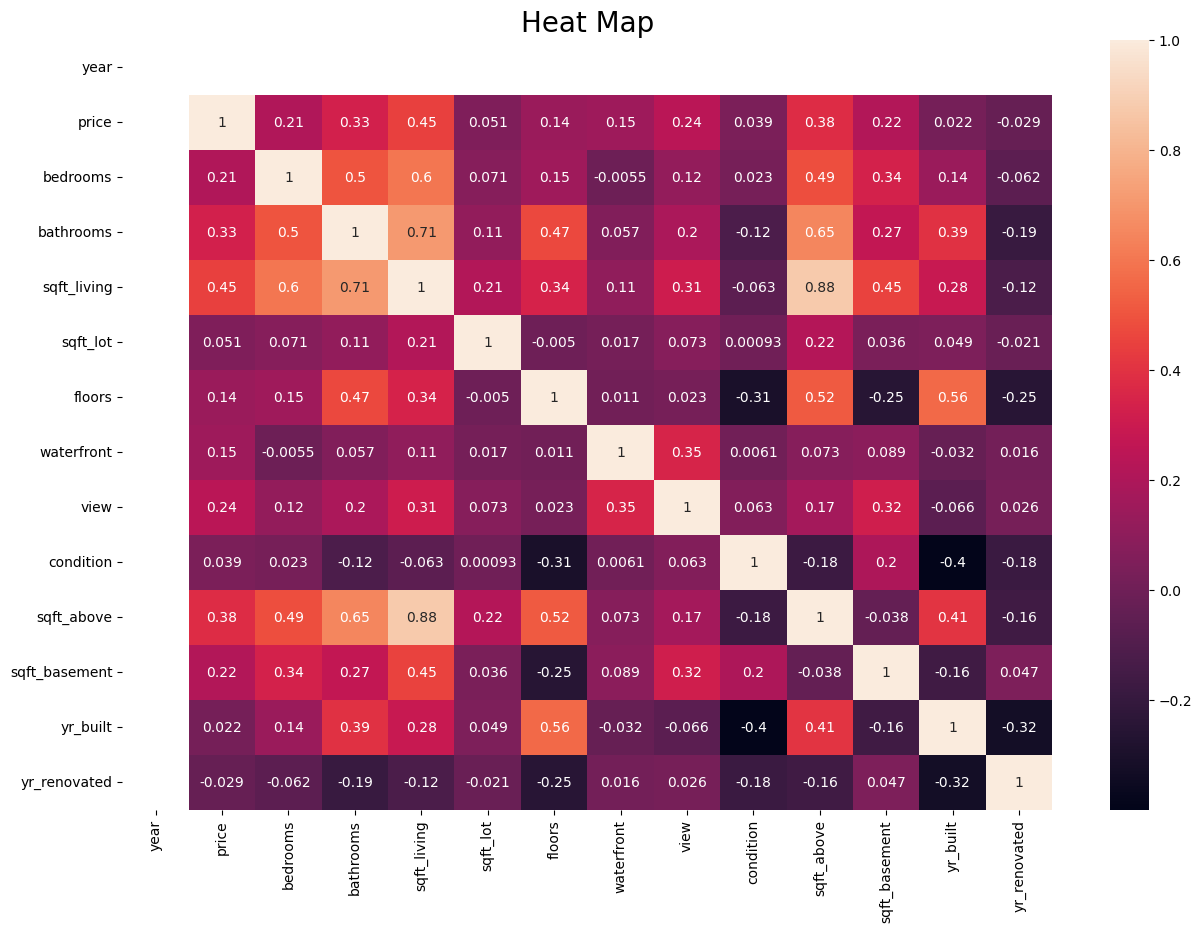

In [22]:
#visualisation de matrice de corr
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

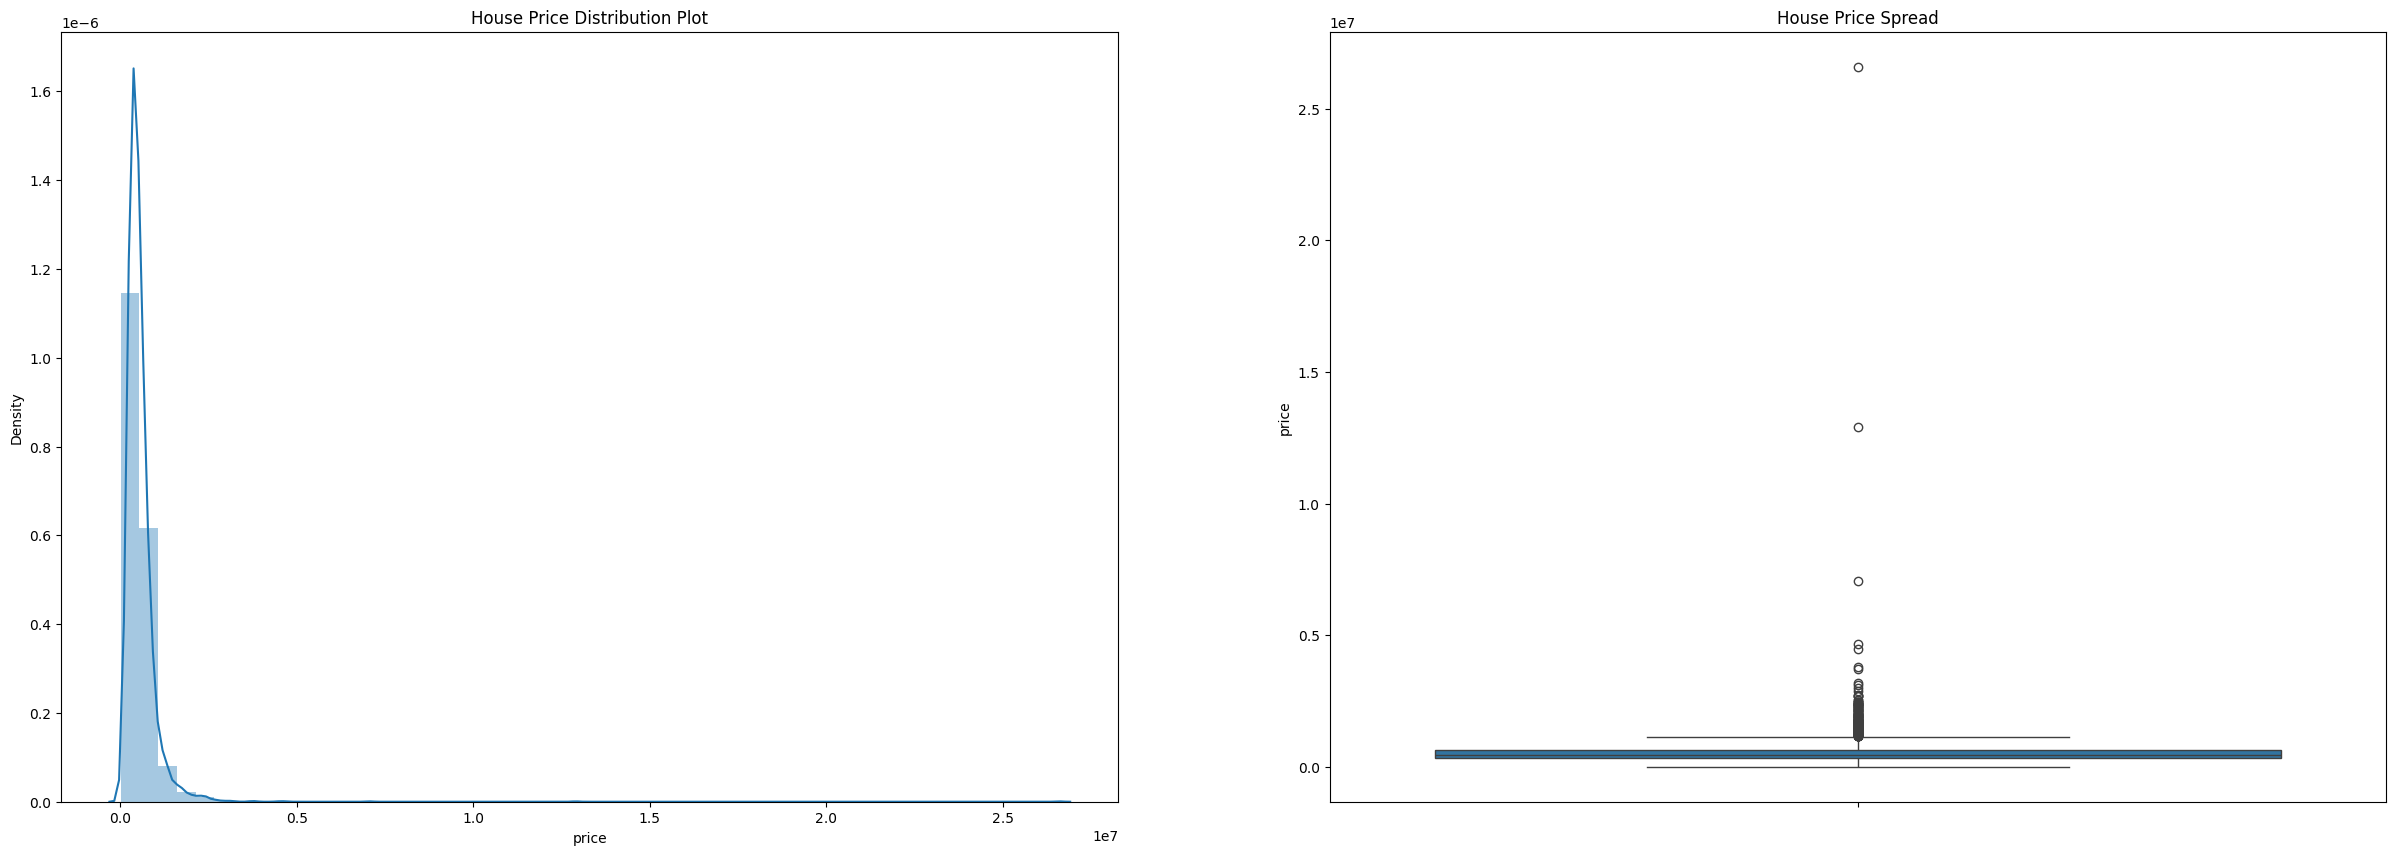

In [23]:

plt.figure(figsize=(30,10))
#affiche la distribution des prix des maisons sous forme d'histogramme 
plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(data["price"])
# affiche la dispersion des prix à l'aide d'un boxplot
plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=data["price"])

plt.show()

In [24]:
# générer des graphiques de comptage (count plots) et 
#des graphiques de dispersion (scatter plots) pour des caractéristiques catégorielles.

def Categorical_Plot(column,rotation=0):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        pd.value_counts(data[column]).plot(kind='bar')
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Count\n", fontsize = 15)

        plt.subplot(1, 2, 2)
        sns.barplot(x = data[column], y = data.price)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

In [25]:
# générer des box plots et des scatter plots pour des caractéristiques numériques

def Numerical_Plot(column):
    
        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.scatterplot(x=data[column],y=data["price"],hue=data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

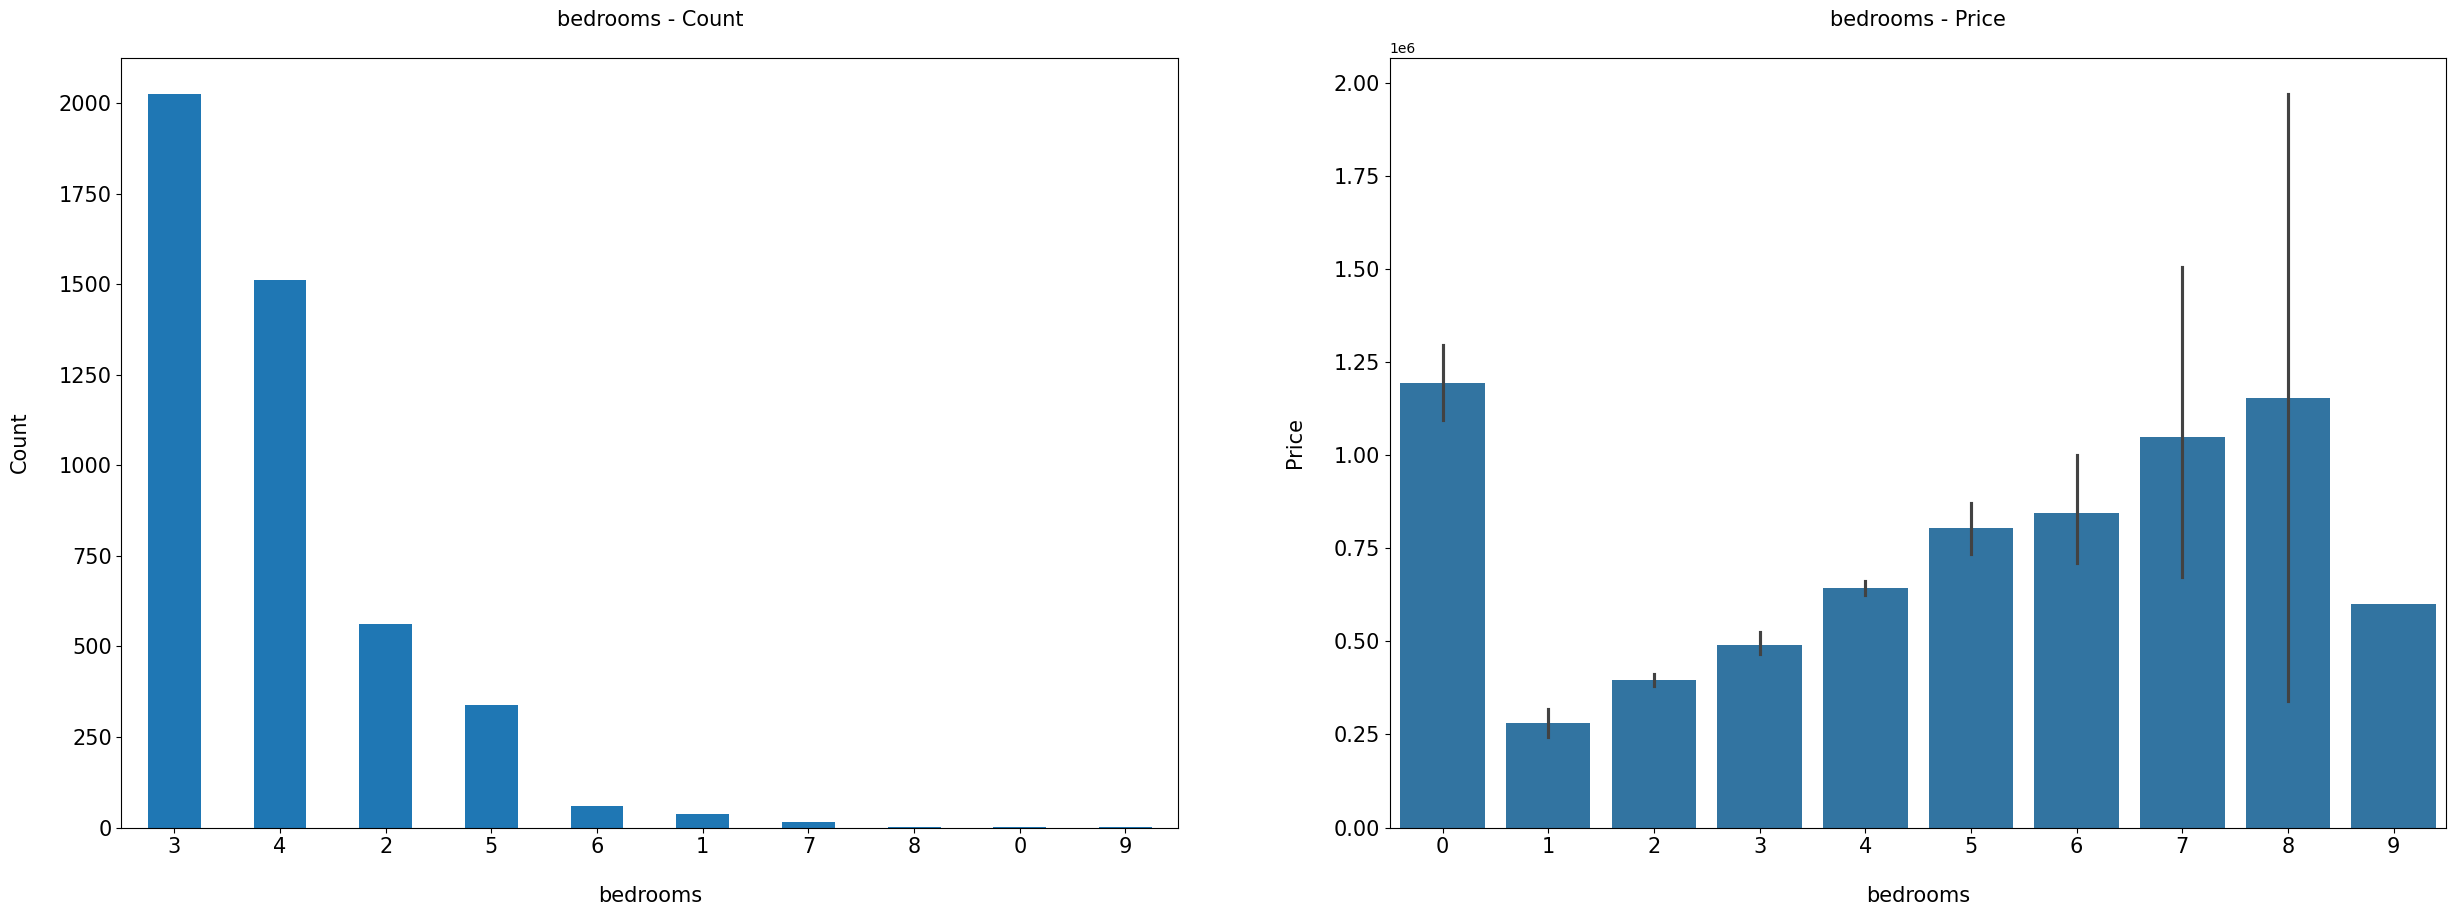

In [26]:
#traiter la fct sur les bed
Categorical_Plot("bedrooms")

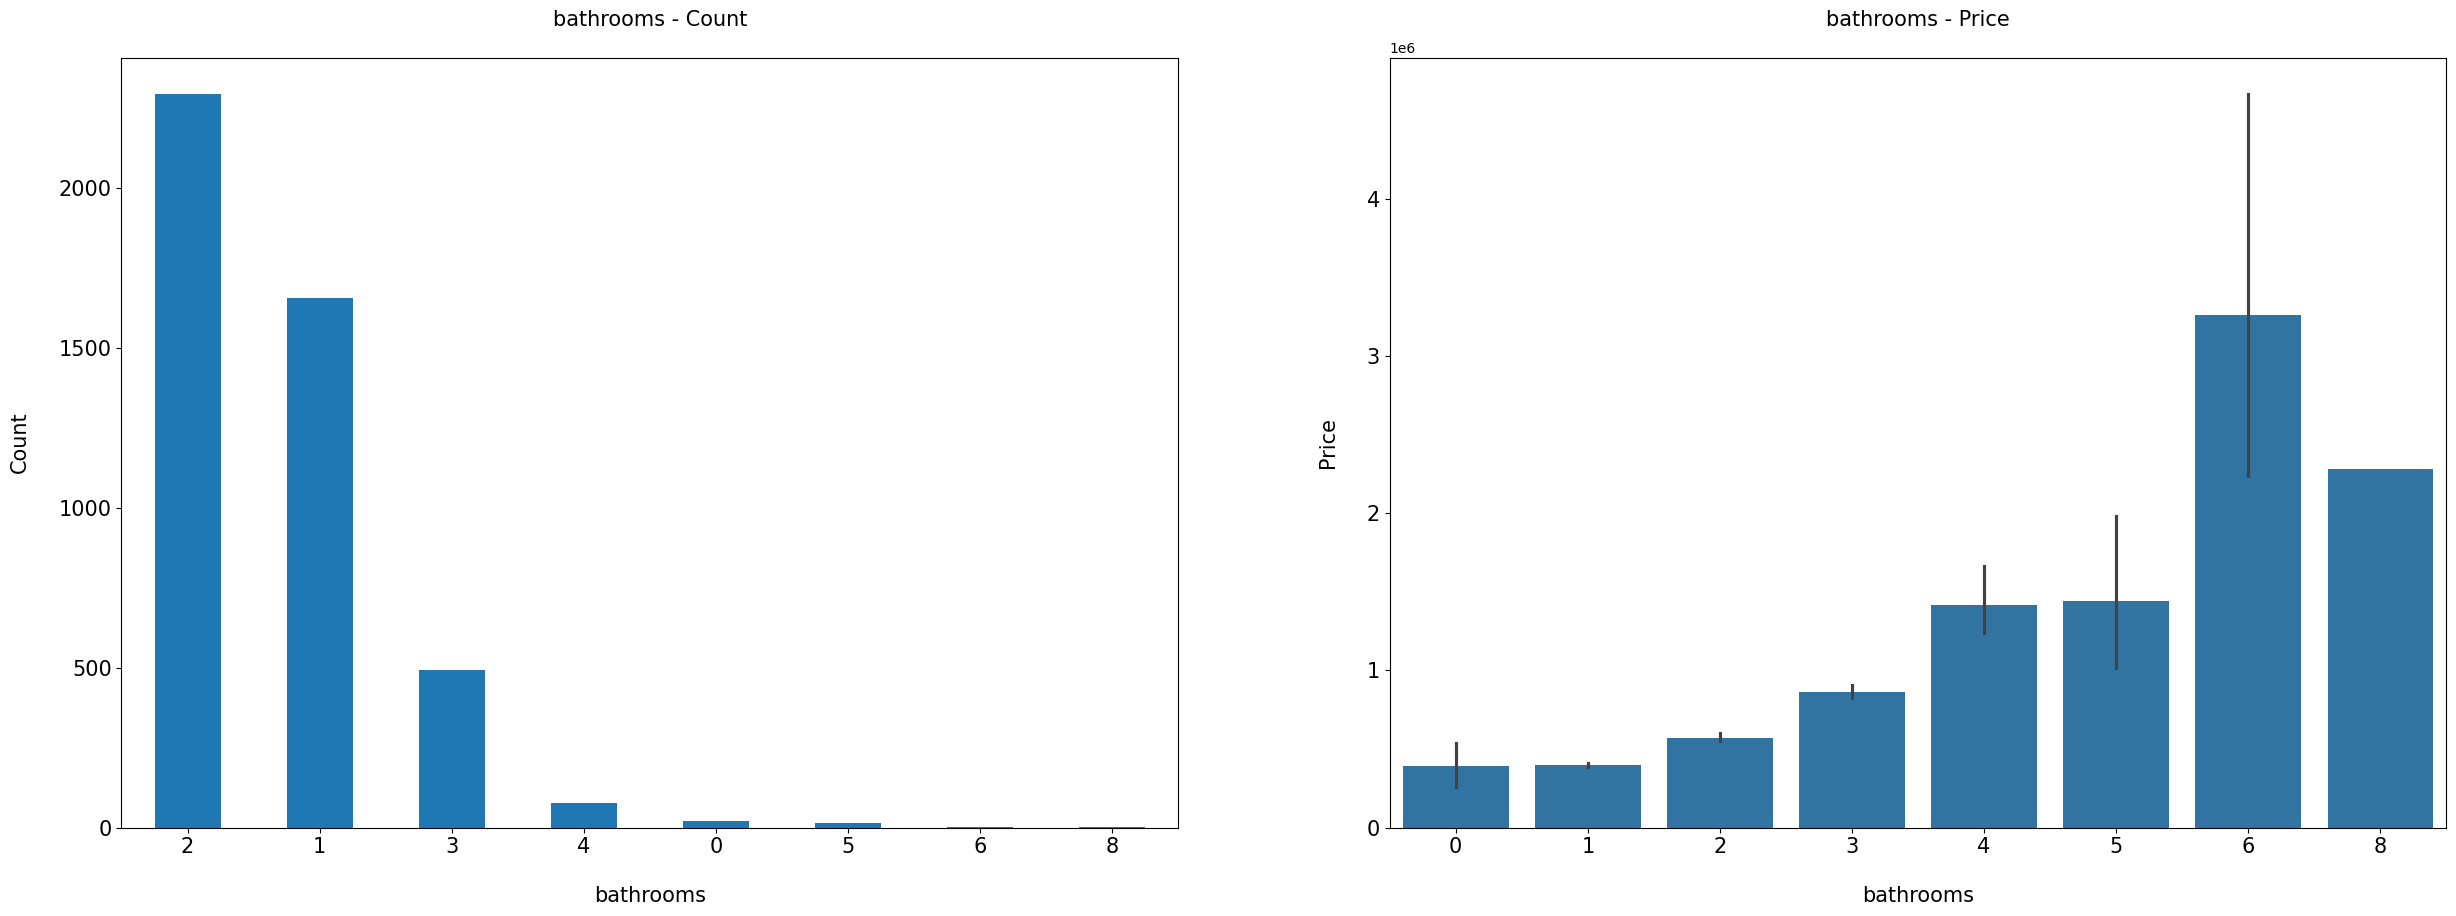

In [27]:
Categorical_Plot("bathrooms")

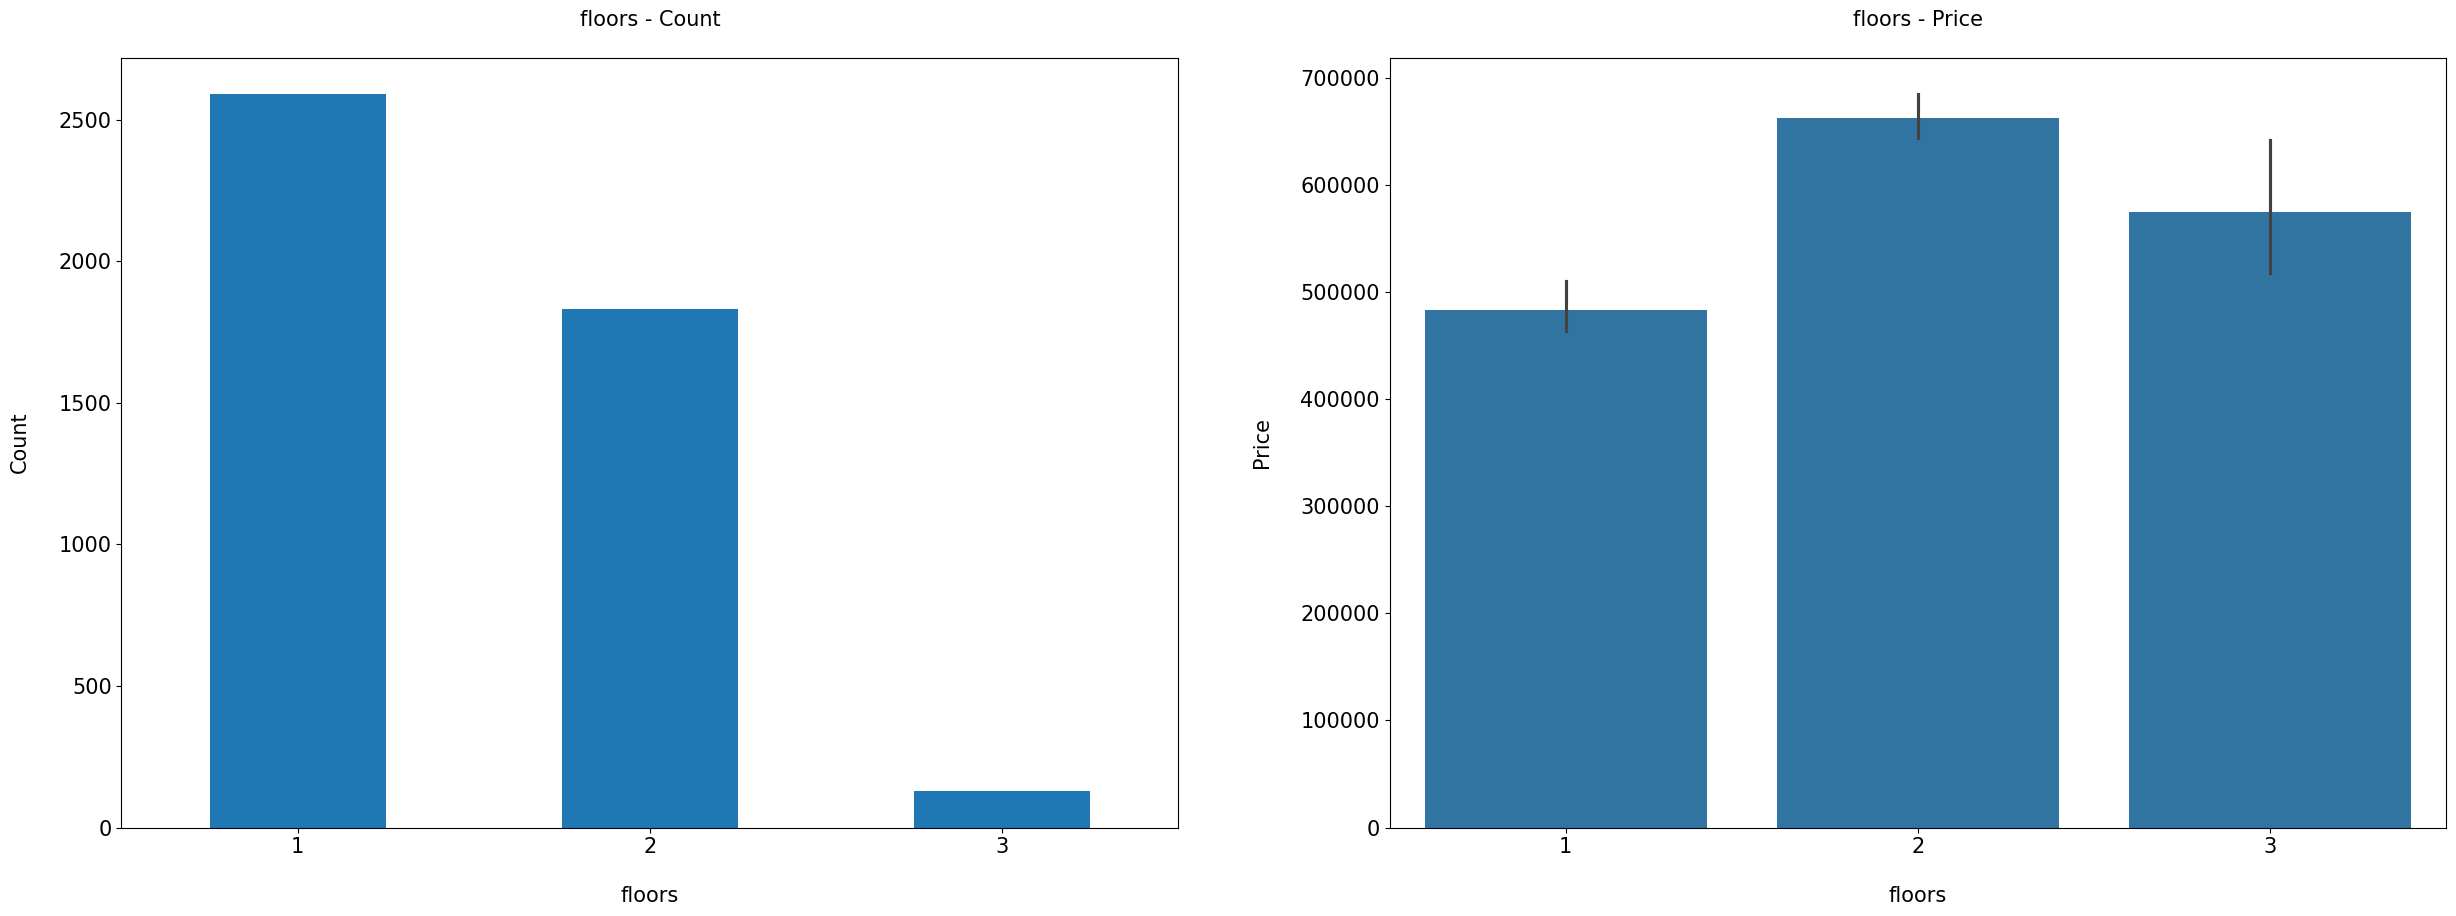

In [28]:
Categorical_Plot("floors")

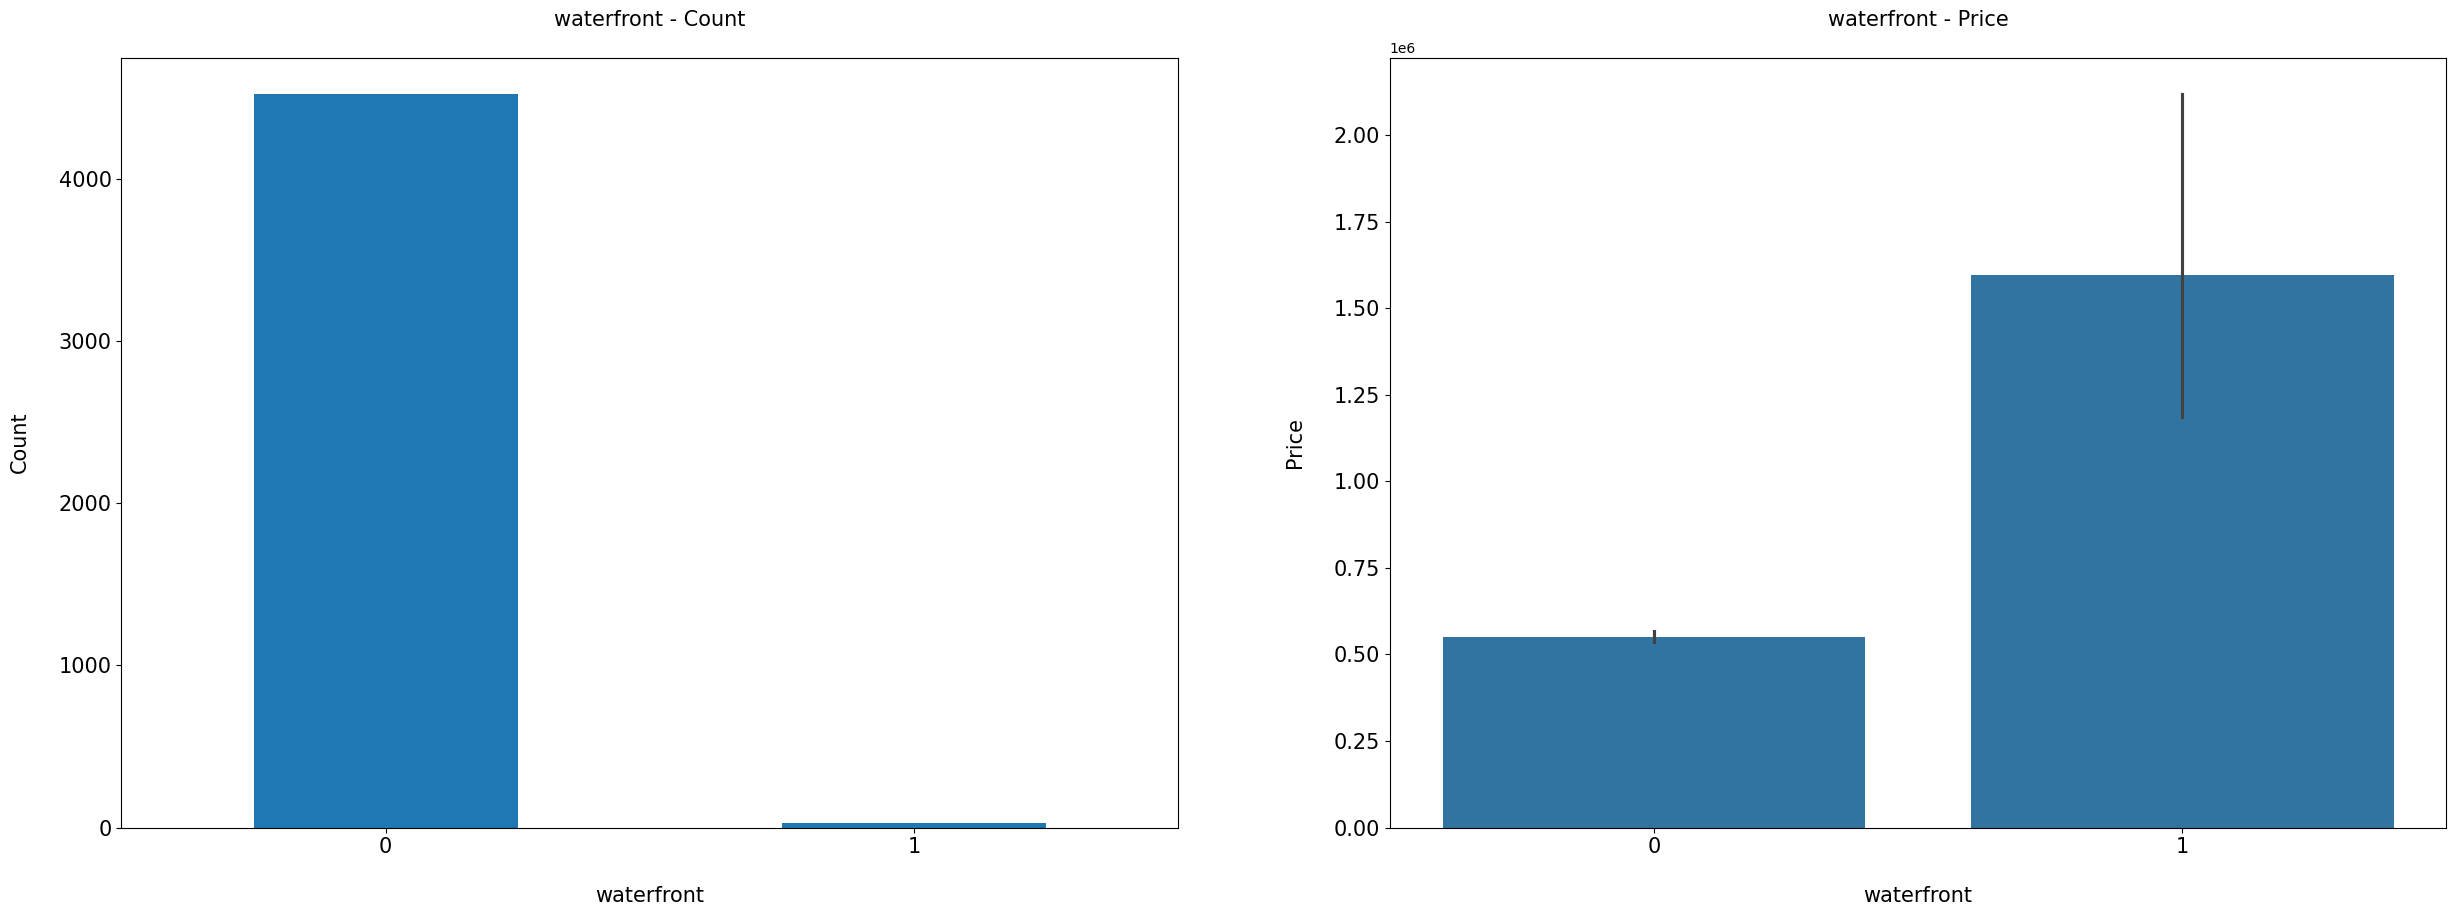

In [29]:
Categorical_Plot("waterfront")

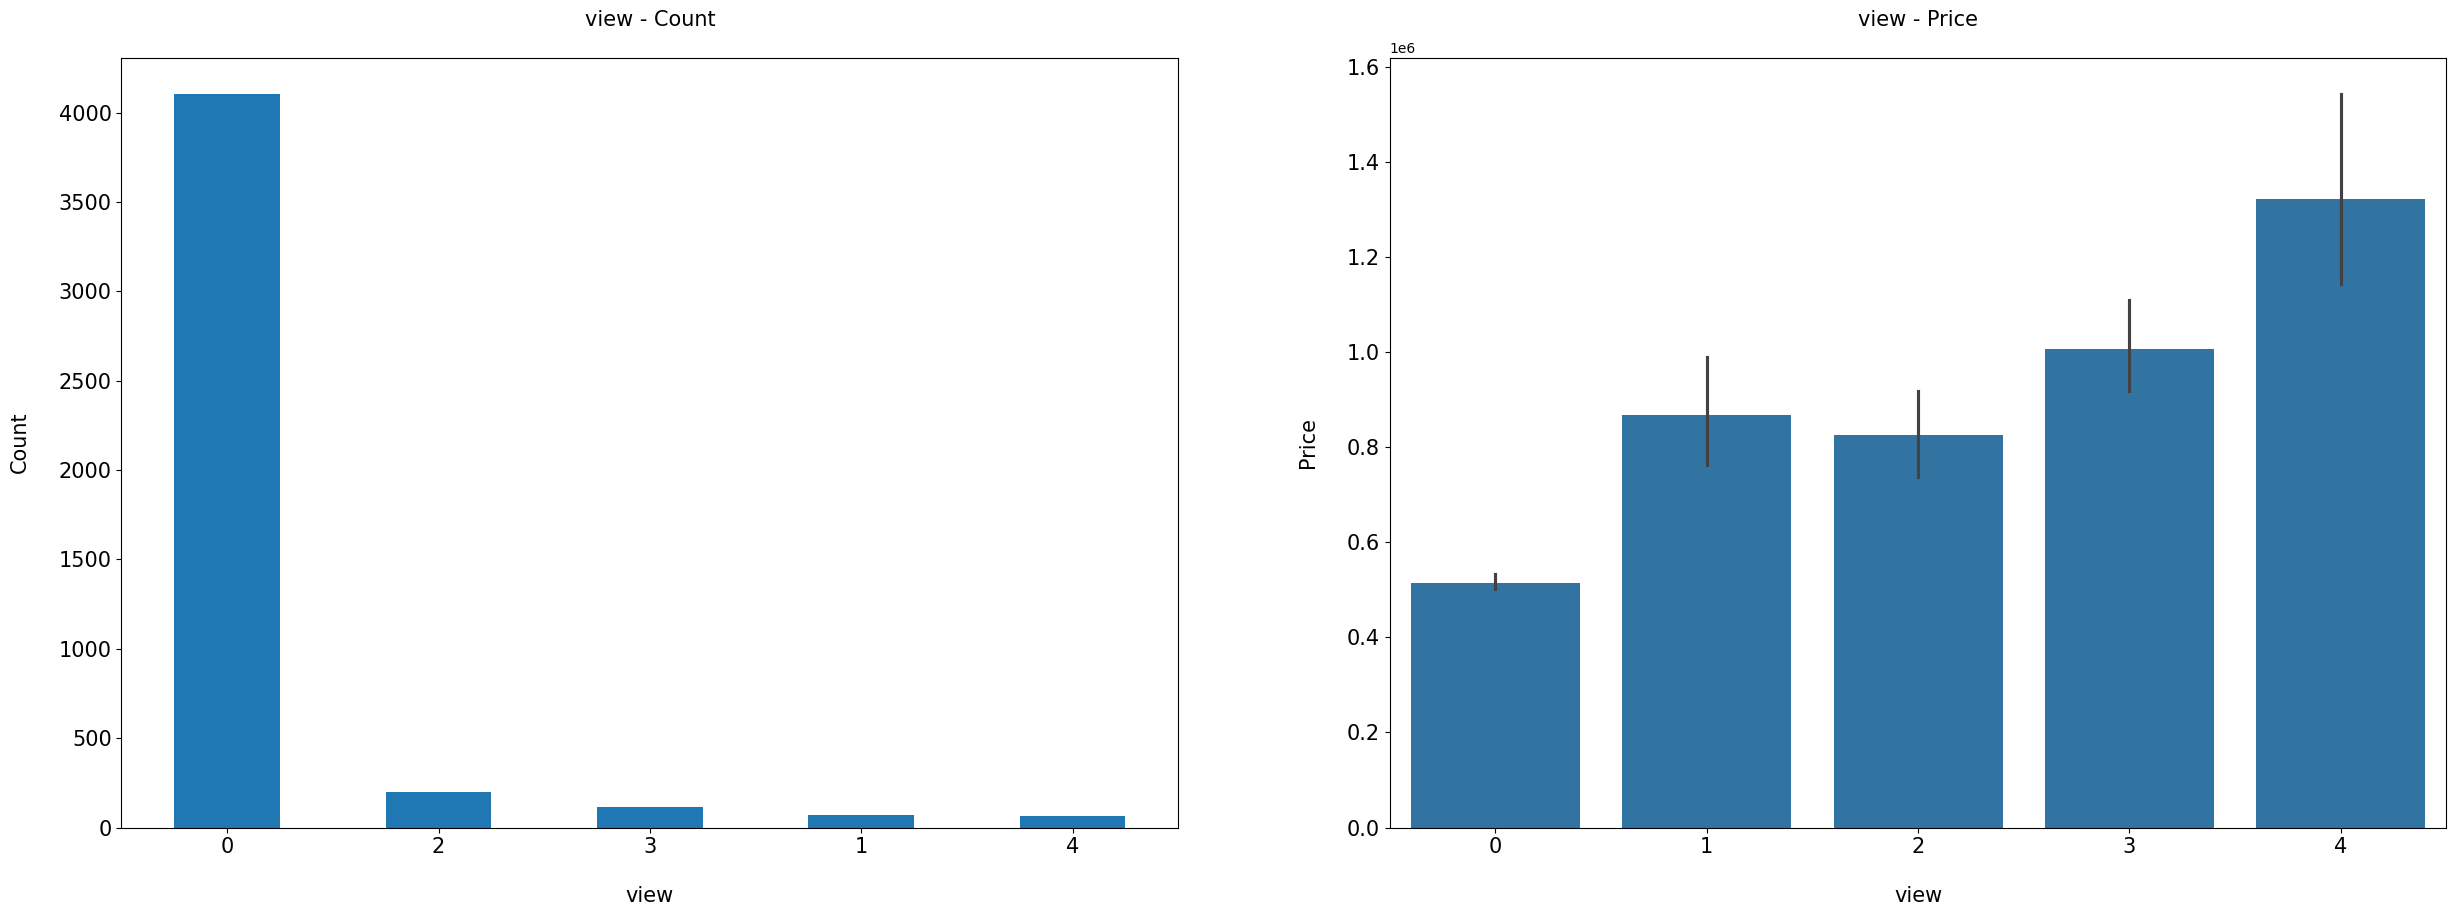

In [30]:
Categorical_Plot("view")

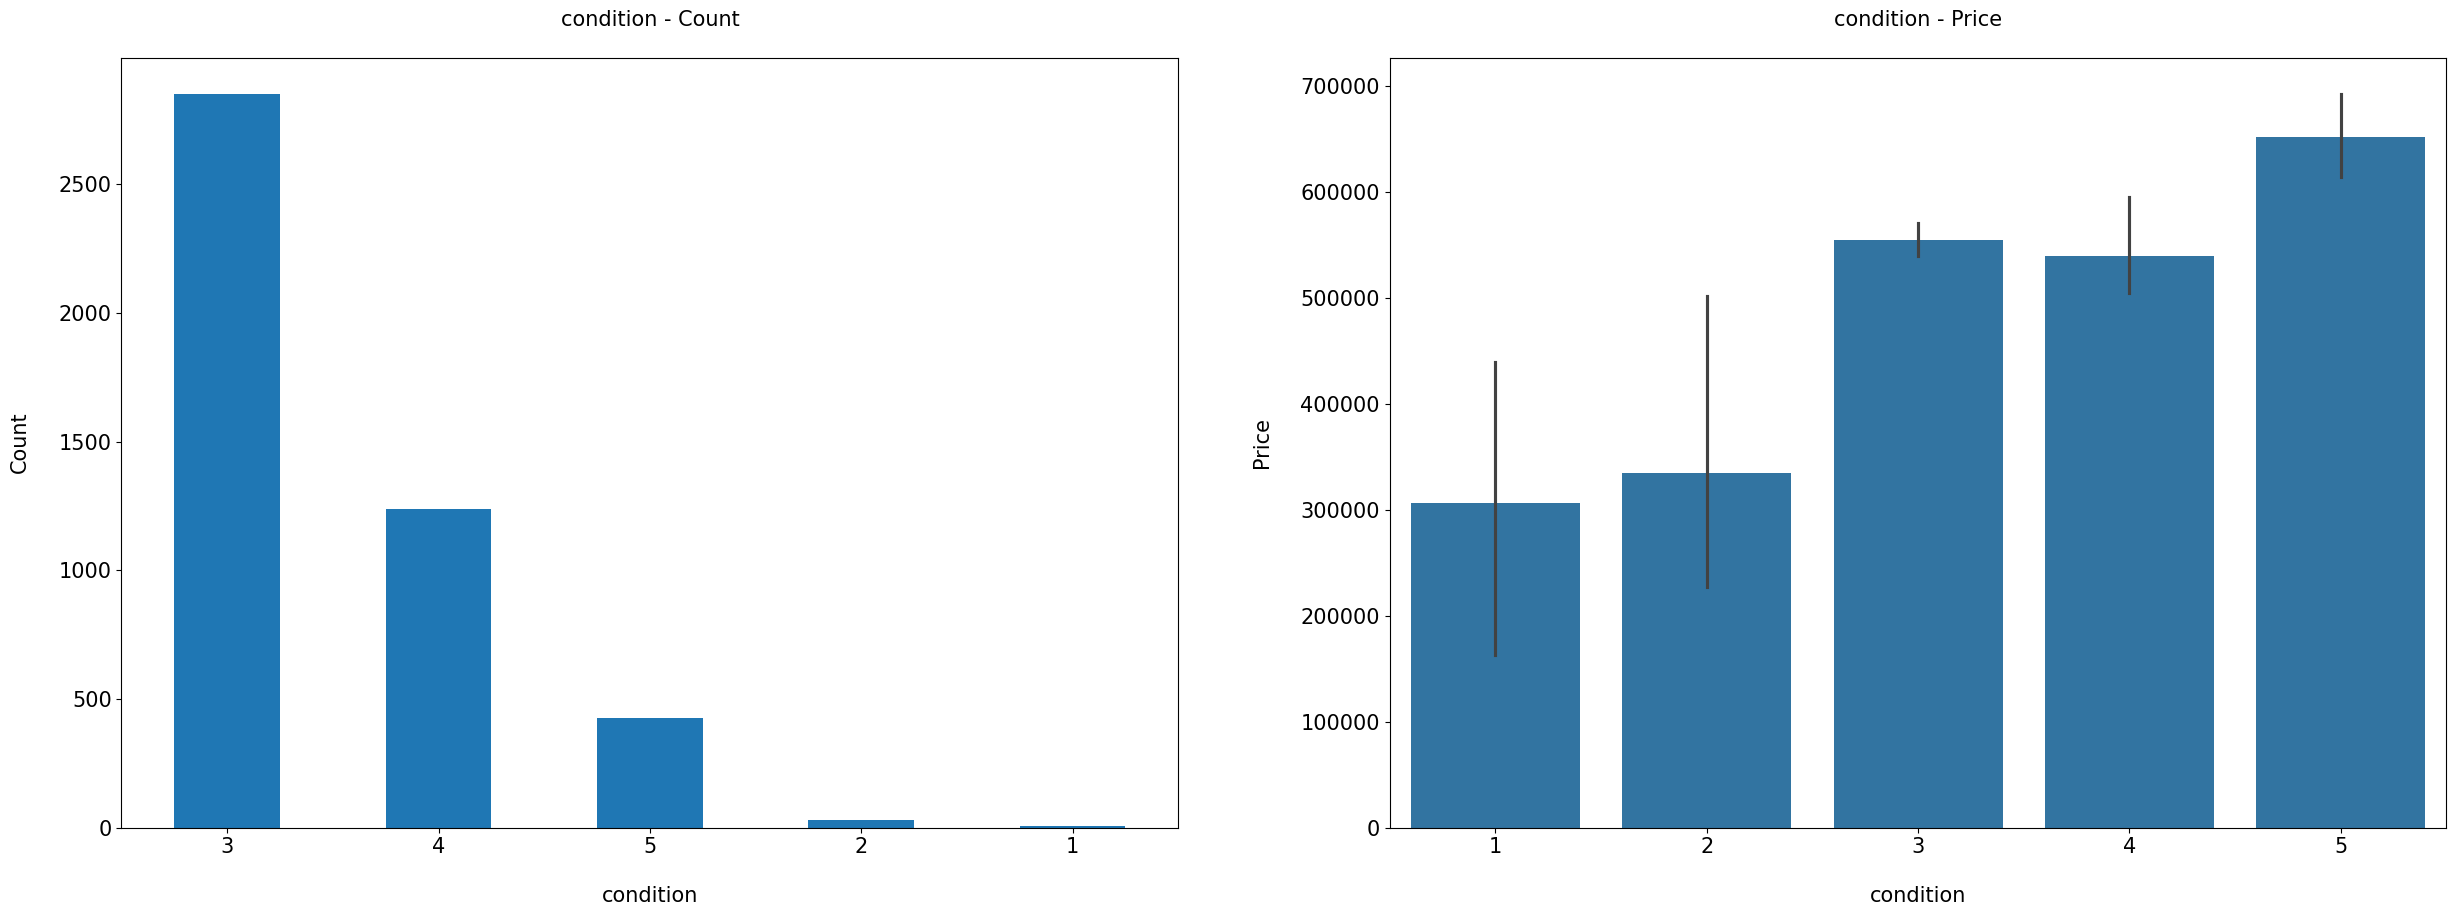

In [31]:
Categorical_Plot("condition")

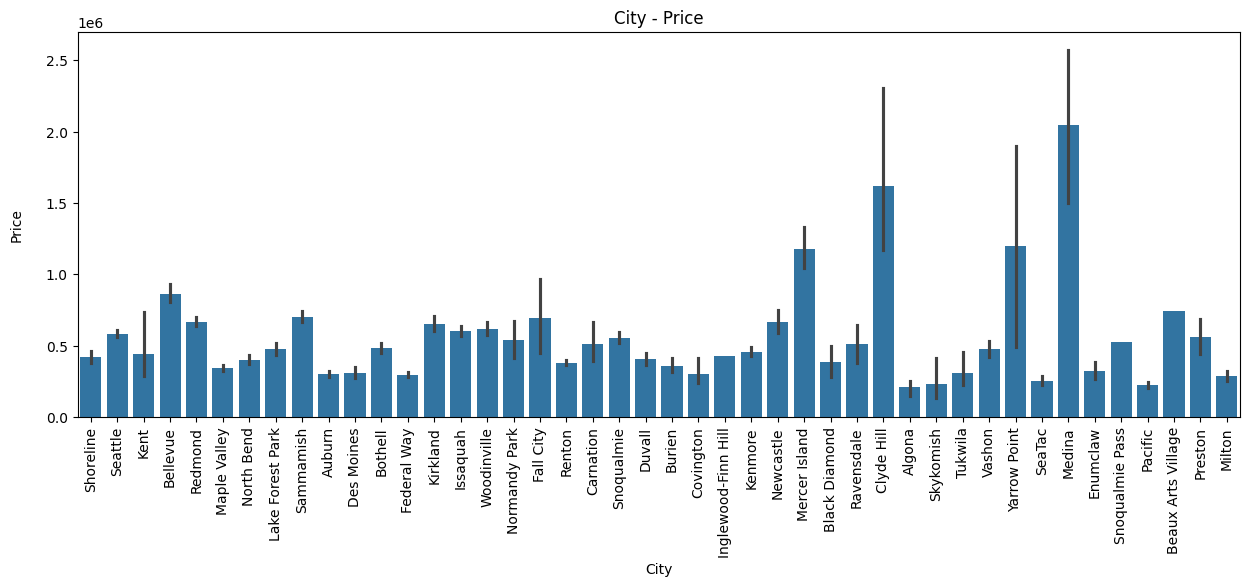

In [32]:
plt.figure(figsize=(15, 5))
# visualisation des prix a partir des villes
sns.barplot(x = data['city'], y = data.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")

plt.show()

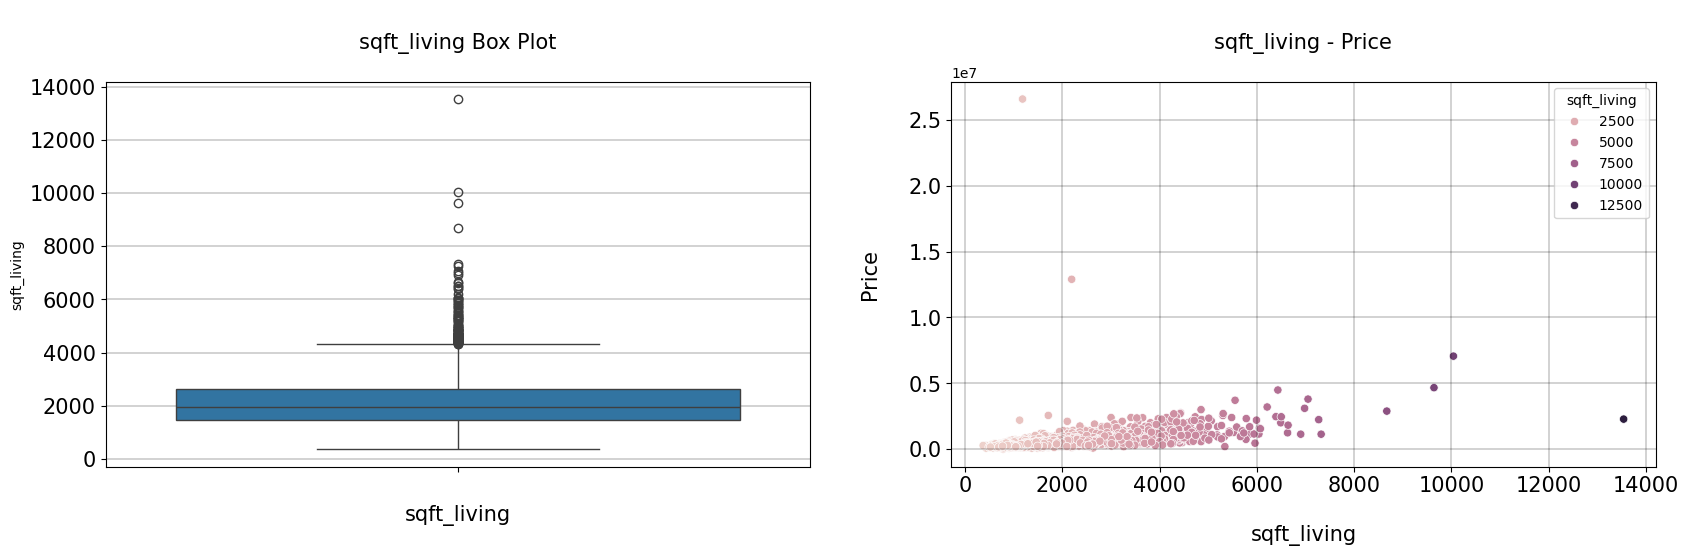

In [33]:
#traitement de fct sur la colonne
Numerical_Plot("sqft_living")

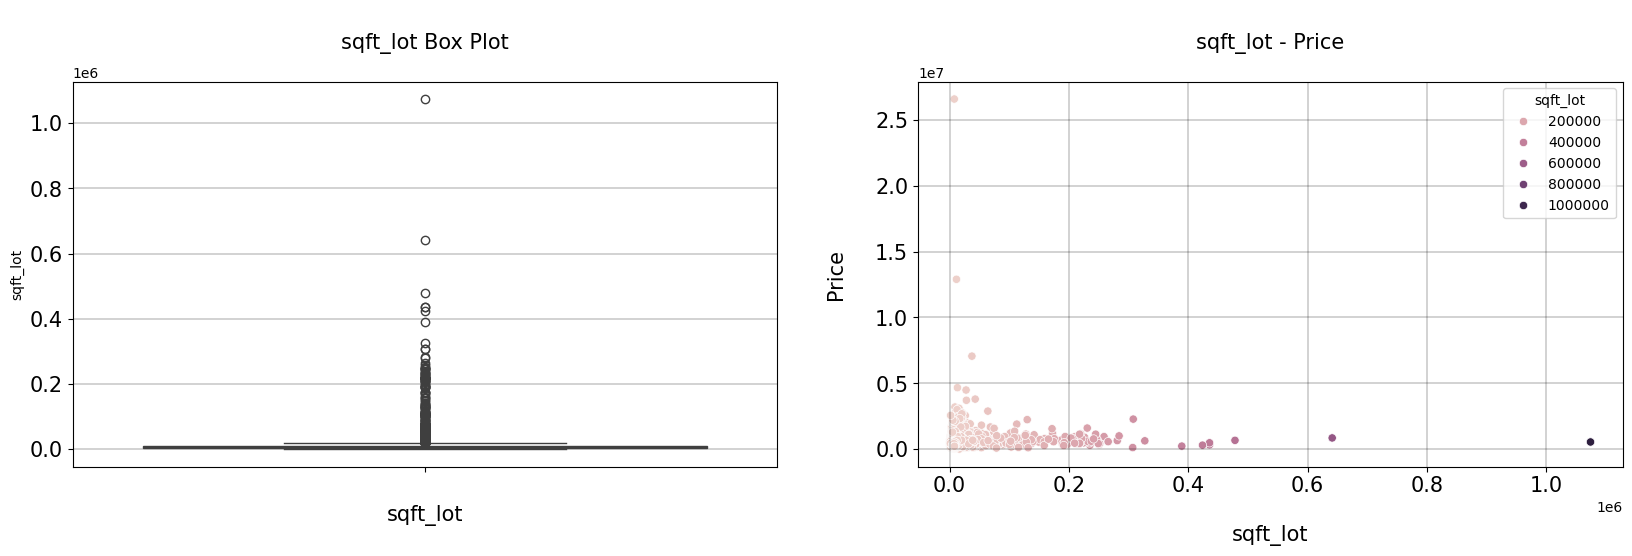

In [34]:
Numerical_Plot("sqft_lot")

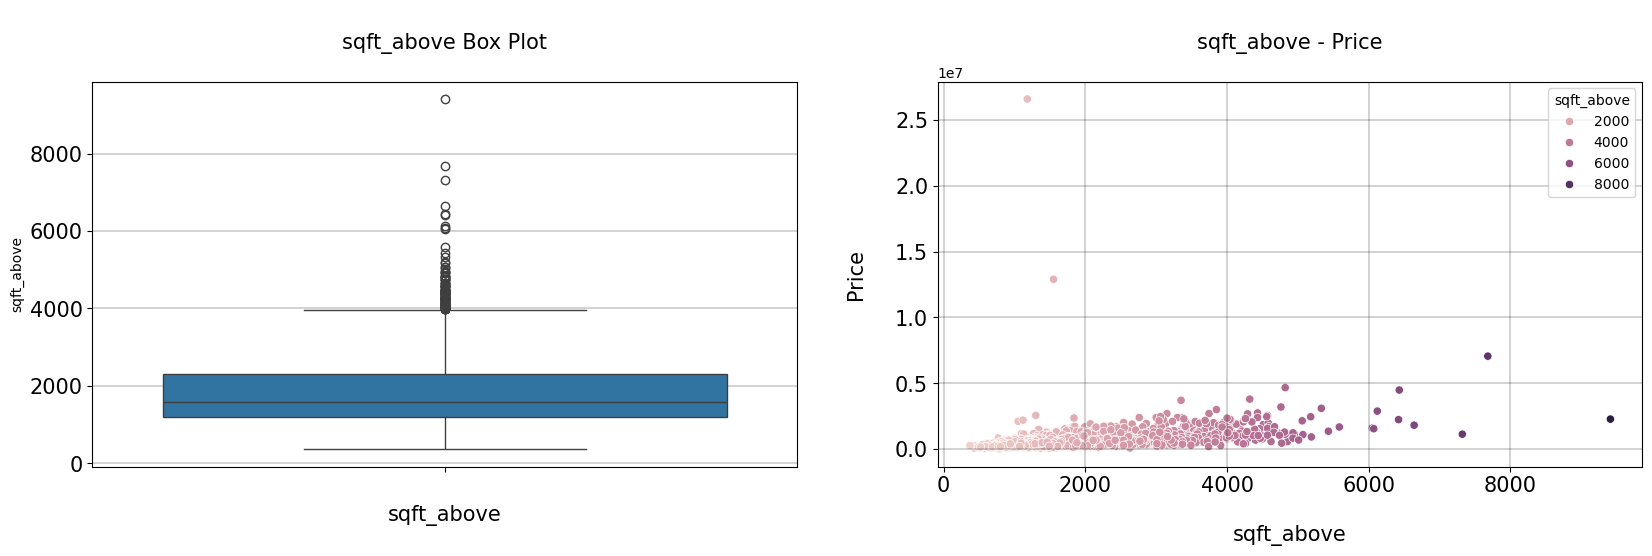

In [35]:
Numerical_Plot("sqft_above")

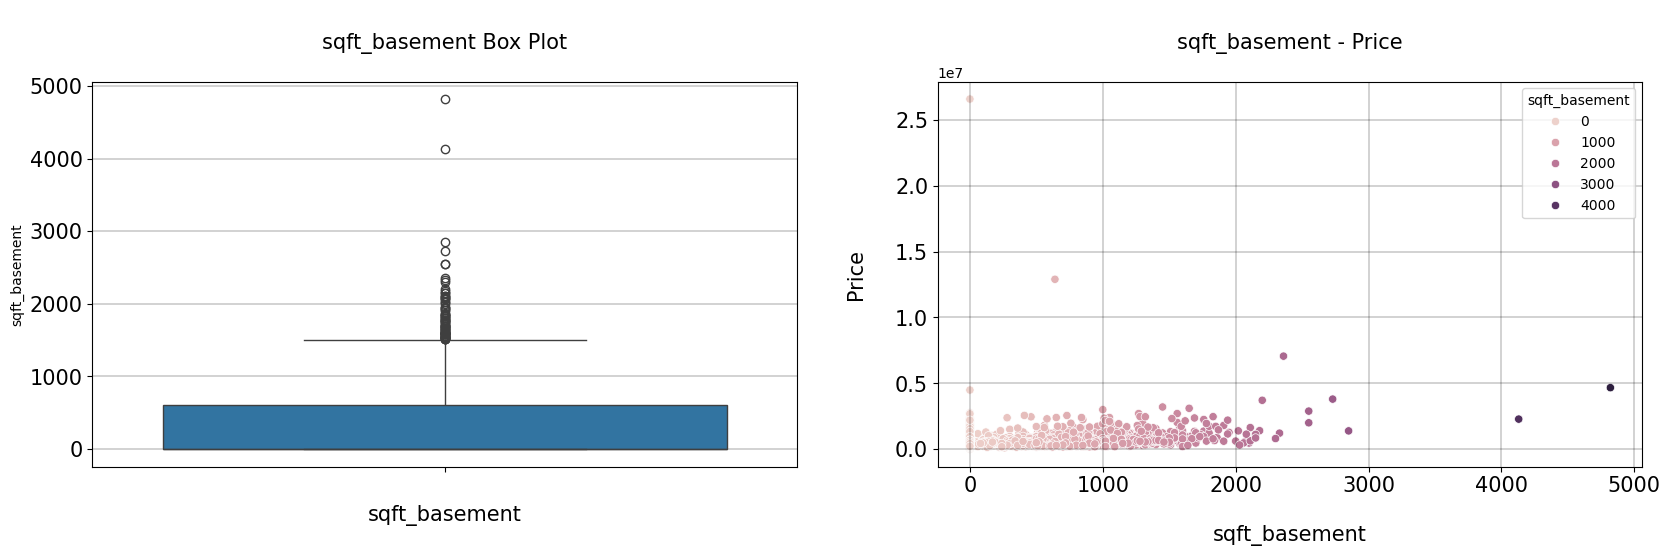

In [36]:
Numerical_Plot("sqft_basement")

<Figure size 2500x500 with 0 Axes>

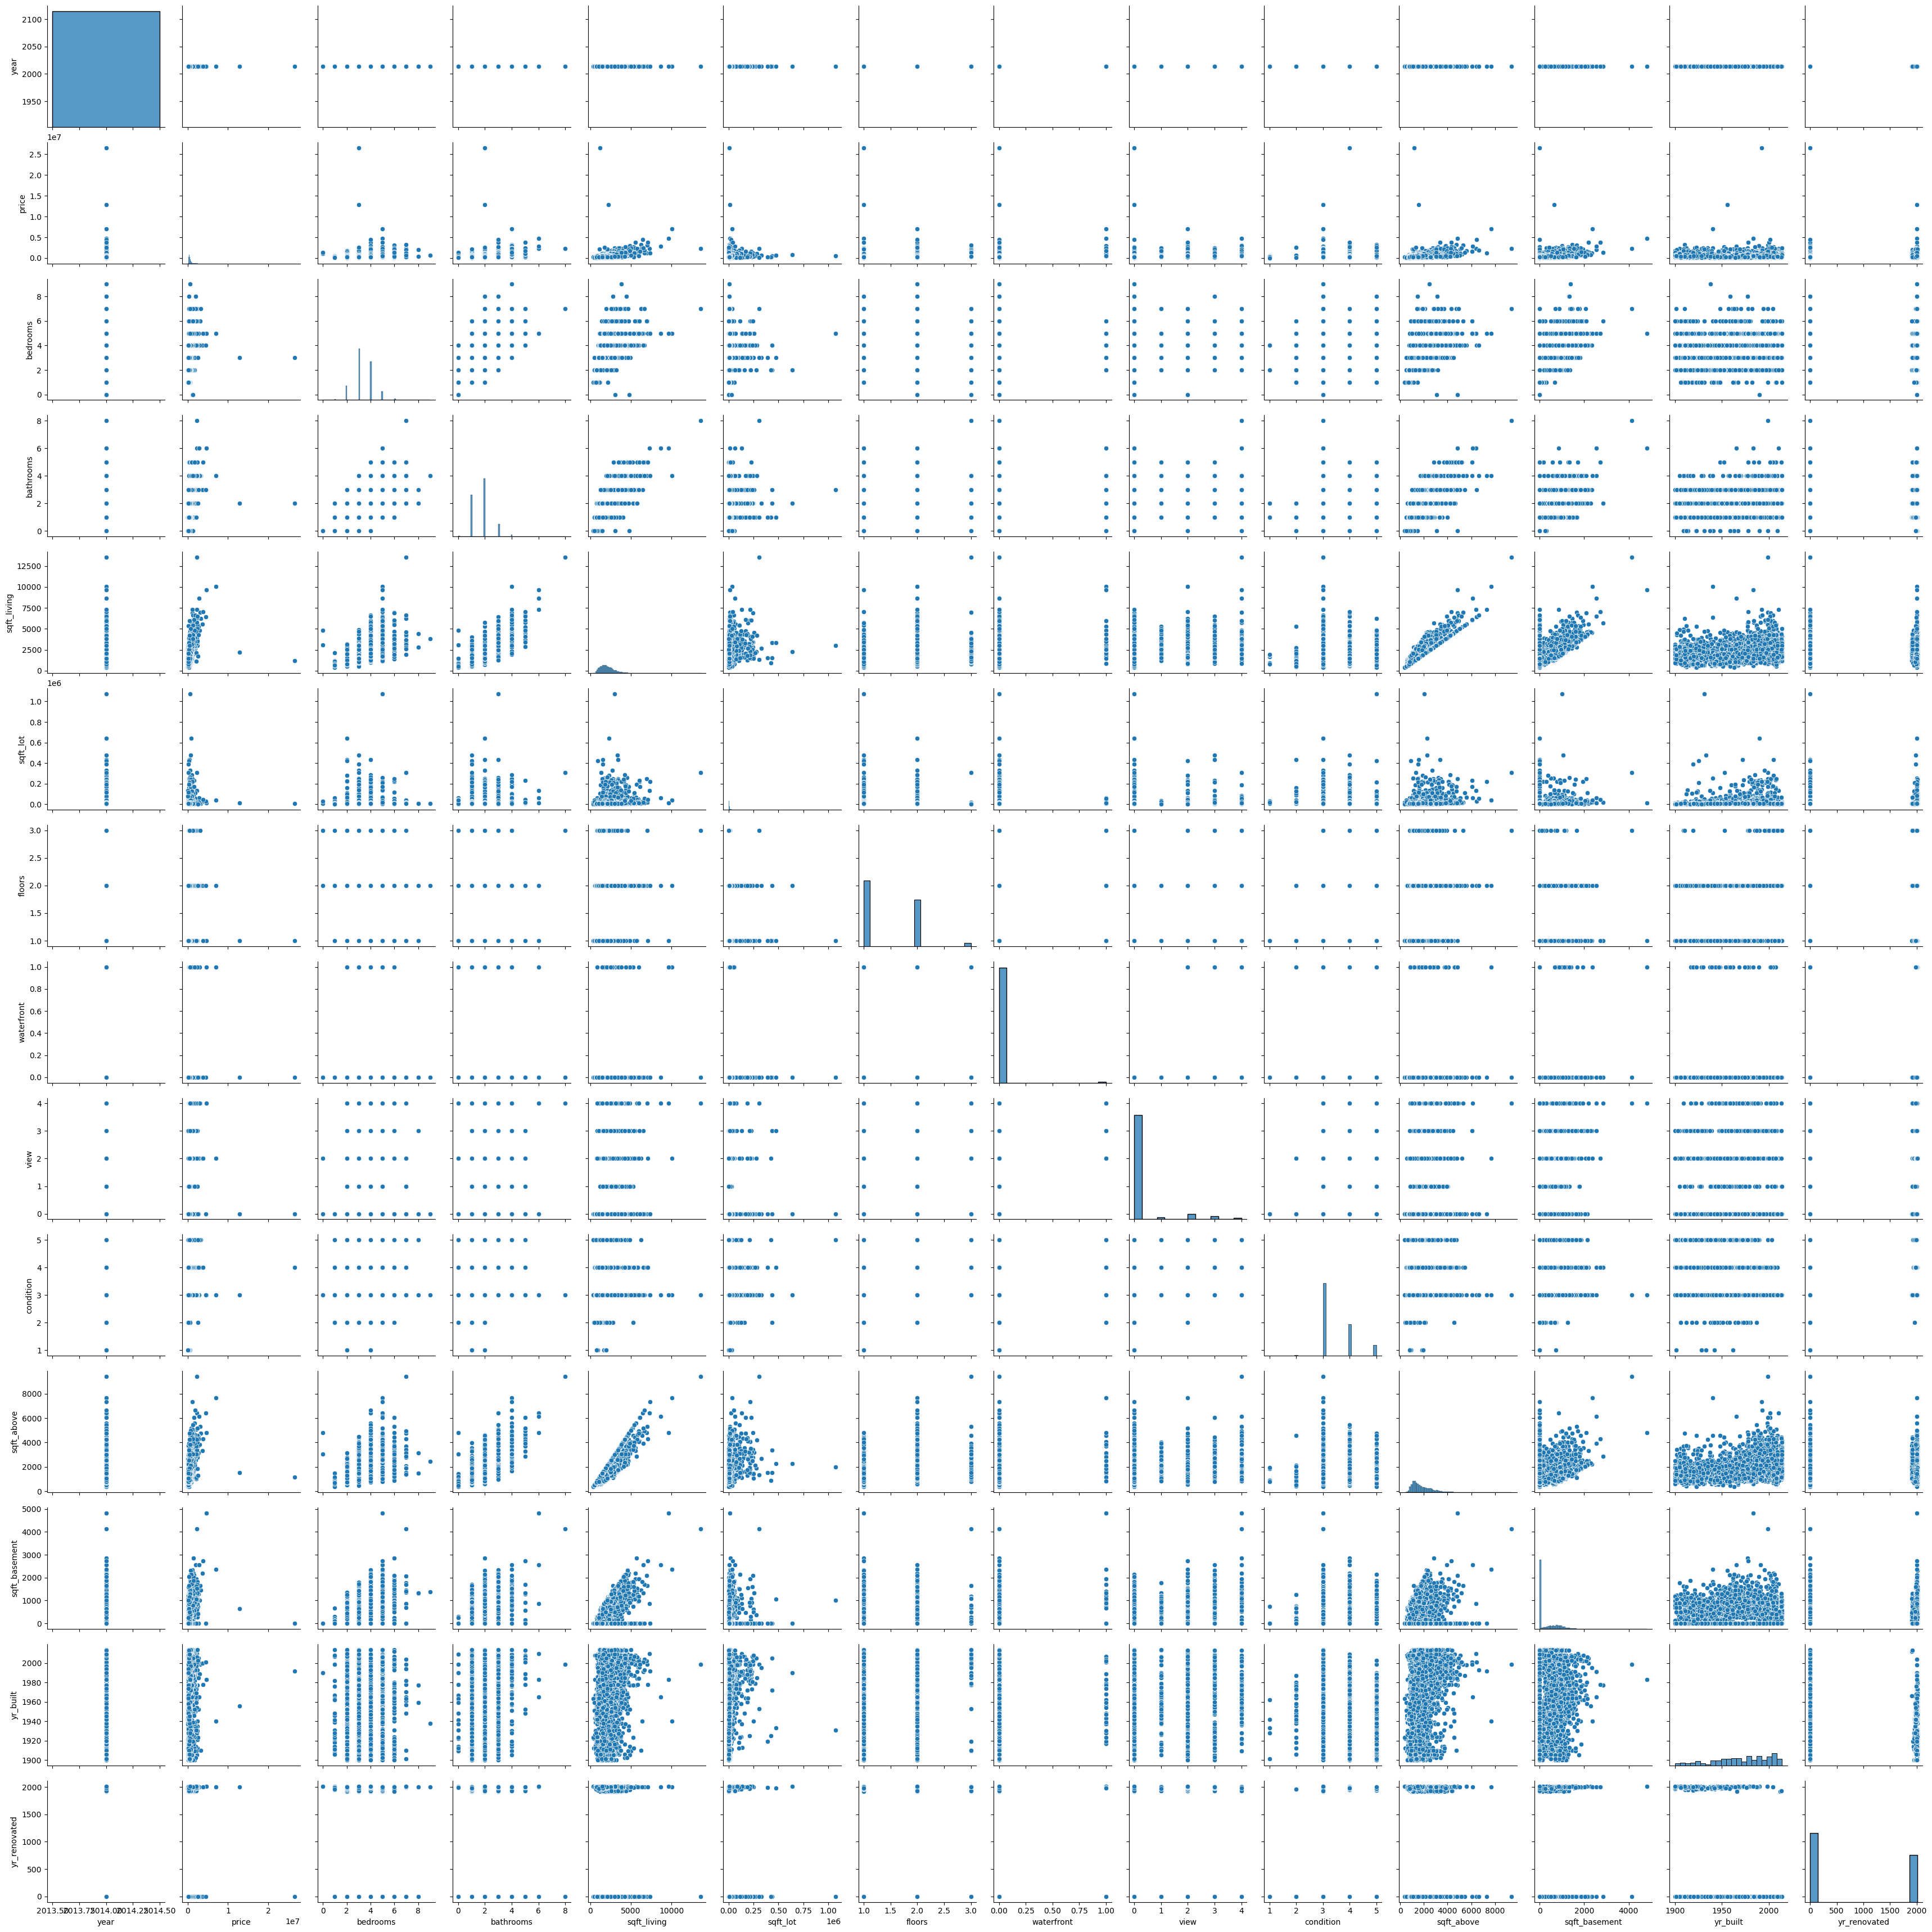

In [37]:
plt.figure(figsize=(25, 5))
#visualisation des colonnes du data
sns.pairplot(data)
plt.show()

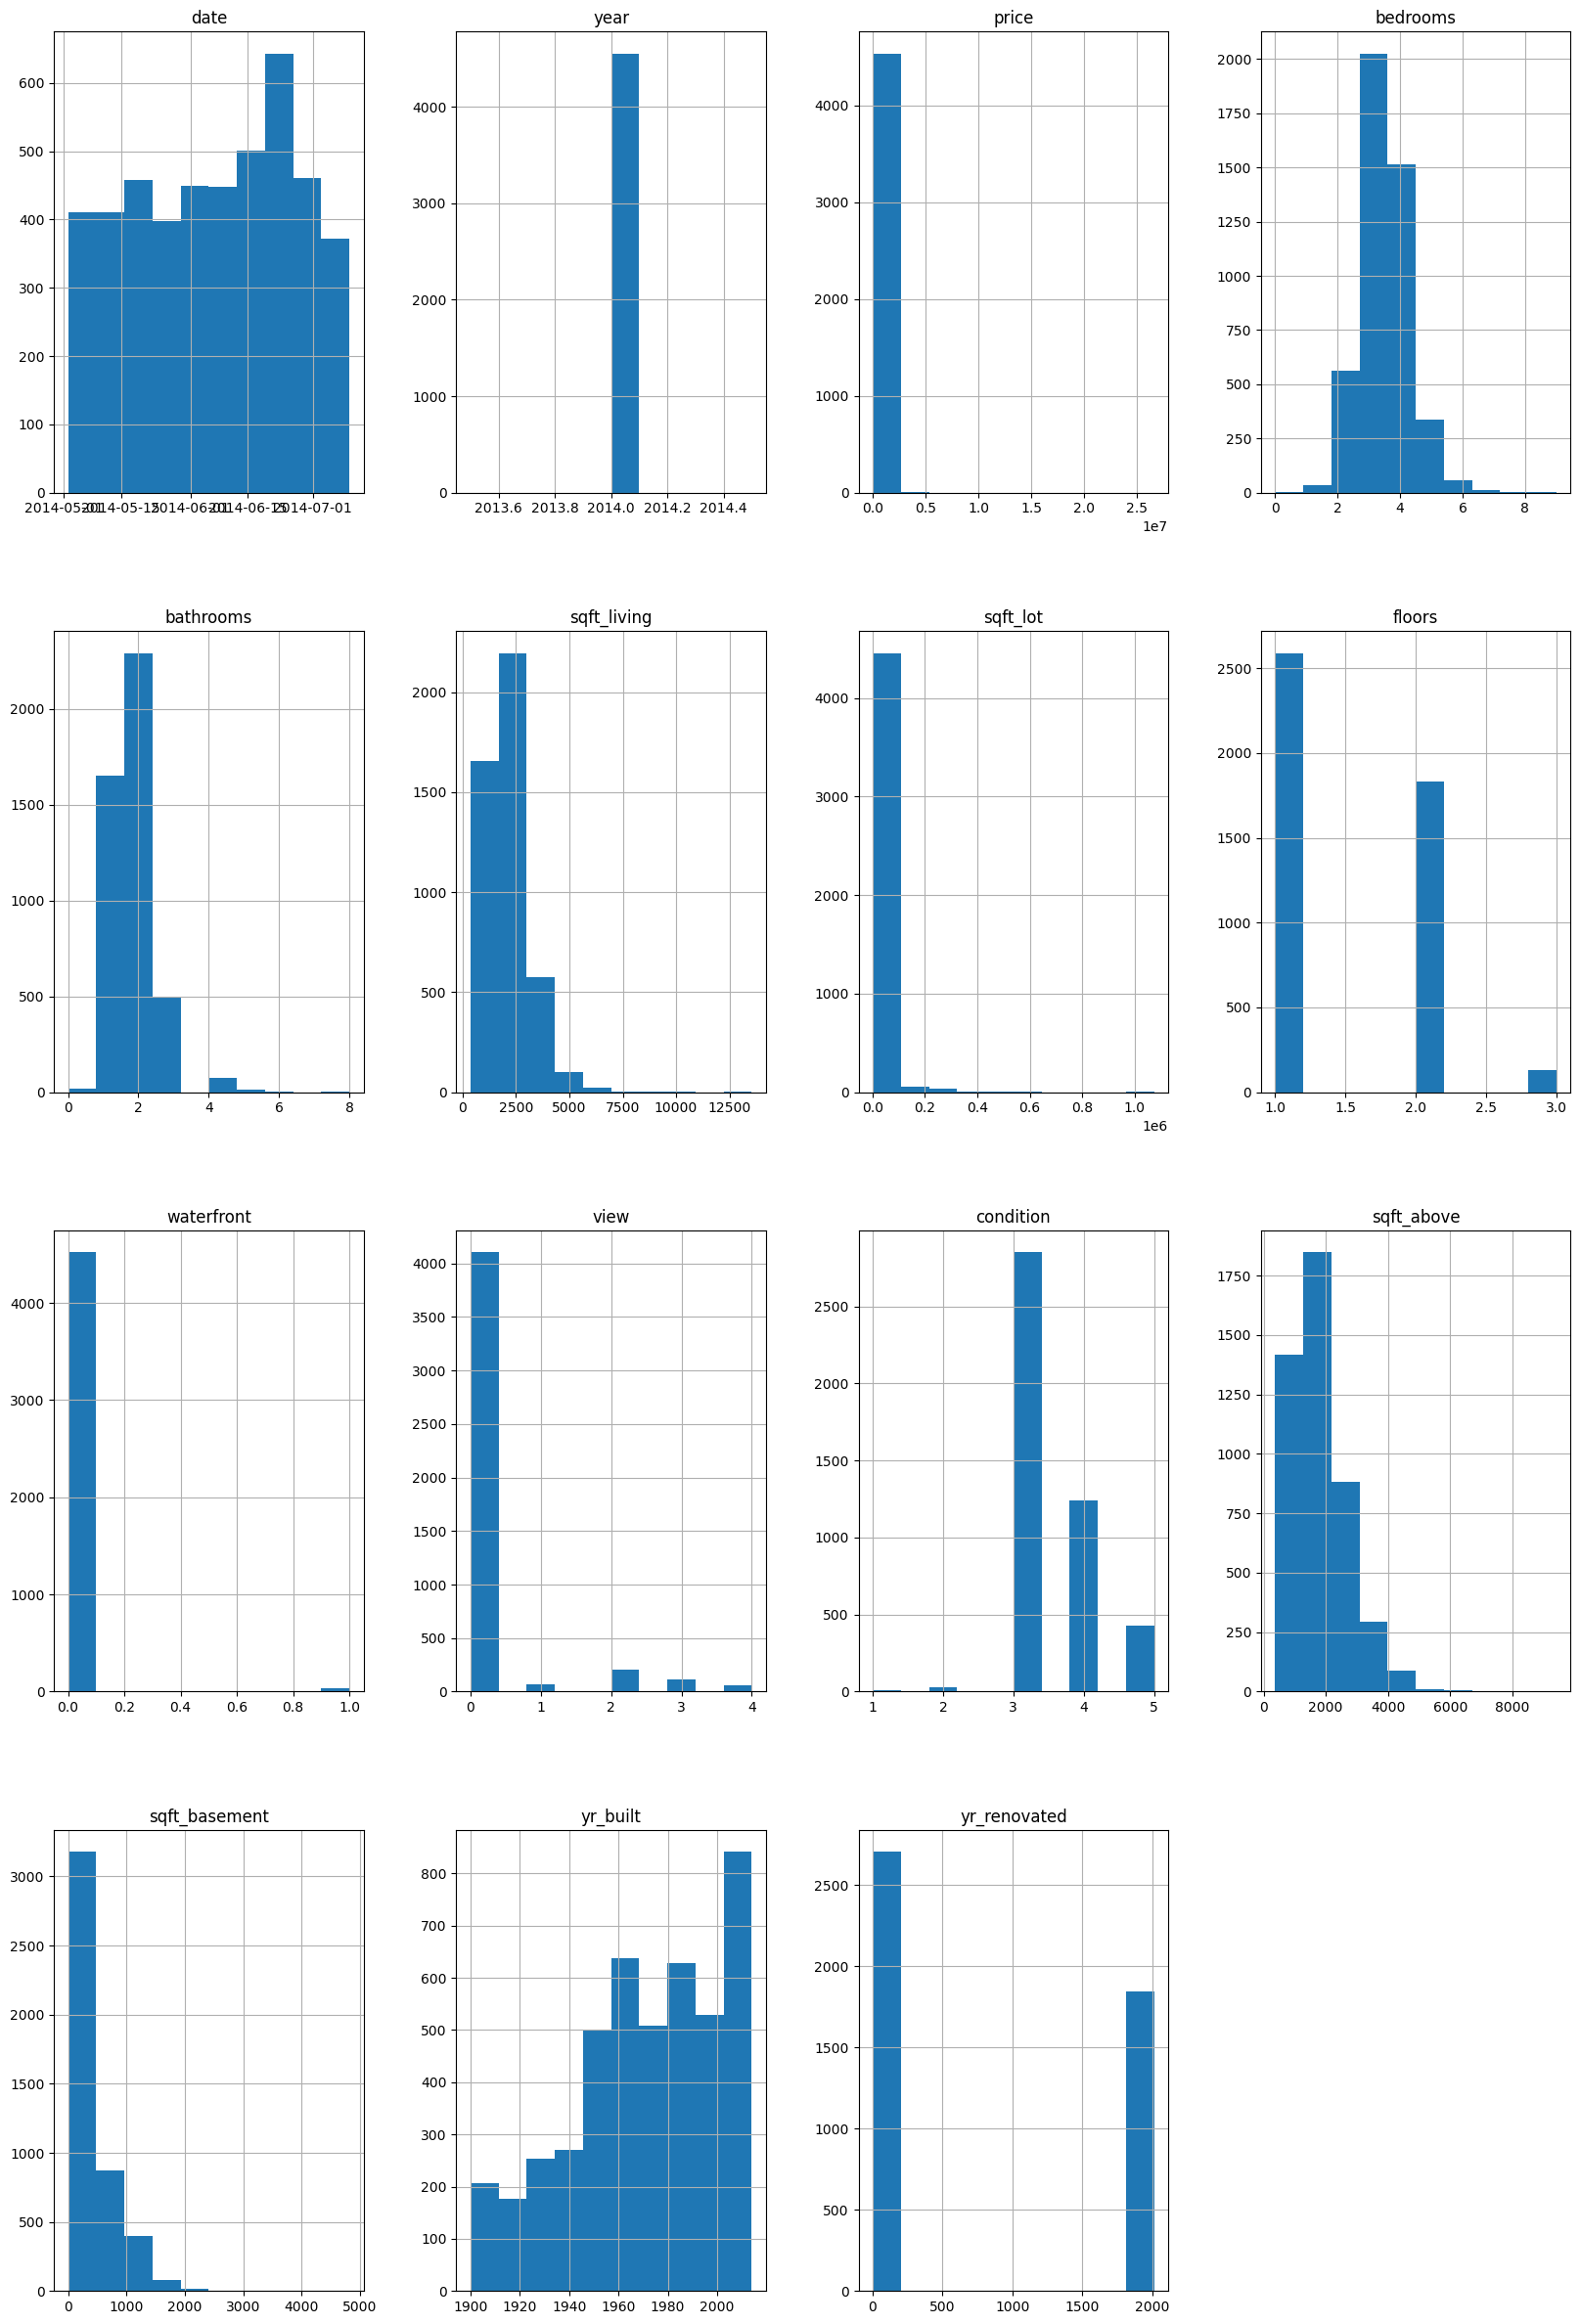

In [38]:
# visualisation sous forme de histogramme
data.hist(figsize=(20,30));

In [39]:
#créer des variables indicatrices numerique à partir de la colonne 'city' 
house = pd.get_dummies(data, columns=['city'], prefix = ['city'])

In [40]:
# supprimmer les colonne suivant
house = house.drop(['date', 'street', 'statezip', 'country','sqft_above'], axis = 1)
house

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014,313000.0,3,1,1340,7912,1,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014,2384000.0,5,2,3650,9050,2,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014,342000.0,3,2,1930,11947,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014,420000.0,3,2,2000,8030,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014,550000.0,4,2,1940,10500,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014,308166.0,3,1,1510,6360,1,0,0,4,...,0,1,0,0,0,0,0,0,0,0
4596,2014,534333.0,3,2,1460,7573,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4597,2014,416904.0,3,2,3010,7014,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4598,2014,203400.0,4,2,2090,6630,1,0,0,3,...,0,1,0,0,0,0,0,0,0,0


In [41]:
#affecter ts les colonnes de data a la variable columns
columns = house.columns

In [42]:
#mettre ts les variable dans un plage entre 0 et 1
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
normal = pd.DataFrame(scaler.fit_transform(house), columns = columns)
normal.head(20)

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.018140,0.222222,0.125,0.038724,0.005348,0.0,0.0,0.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.012309,0.222222,0.250,0.074412,0.001790,0.0,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.017839,0.444444,0.250,0.177677,0.032815,0.5,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.016729,0.333333,0.250,0.156416,0.081771,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.023783,0.444444,0.250,0.087320,0.005181,0.0,0.0,0.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
house.shape

(4551, 57)

In [44]:
#contient toutes les colonnes de data sauf "price"
x = normal.drop("price", axis=1)
# contient uniquement la colonne "price"
y = pd.DataFrame(normal["price"])

In [45]:
# diviser ls données en ensembles d'entraînement (training) et de test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =43 )

In [46]:
#affichage
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3640, 56)
(3640, 1)
(911, 56)
(911, 1)


In [47]:
 # Créer une instance du modèle de régression linéaire
model = LinearRegression()
#Entraîner le modèle sur l'ensemble d'entraînemen
model.fit(X_train, Y_train)
#faire des prédictions sur de nouvelles données de test
Y_pred = model.predict(X_test)

In [48]:
#evaluation du modèle pour les données d'entrainement
model.score(X_train,Y_train)

0.24285610550366699

In [49]:
#evaluation du modèle pour les données de teste
model.score(X_test,Y_test)

0.6656118362248491

In [50]:
# Affichage des coefficients du modèle
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-7.24341987e+09]
Coefficients: [[-2.69170070e+06 -1.25616532e-02  1.85497770e-02  1.19592949e-01
  -1.19625868e-02 -2.28448199e-03  1.33470456e-02  9.98971485e-03
   6.75856894e-03 -1.96378350e-02 -1.92417959e-03  1.98183512e-04
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09
   7.24341987e+09  7.24341987e+09  7.24341987e+09  7.24341987e+09]]


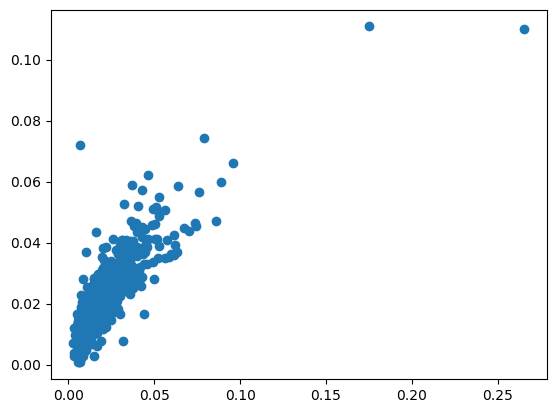

In [51]:
plt.scatter(Y_test,Y_pred)

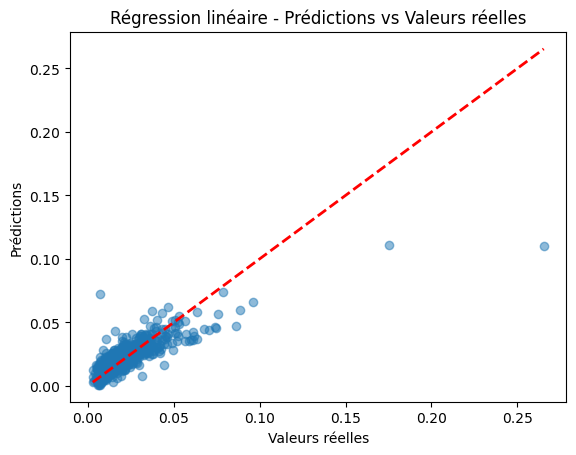

In [73]:
# Tracer la ligne de régression linéaire
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red', linestyle='--', linewidth=2)
plt.title('Régression linéaire - Prédictions vs Valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.show()

In [74]:
# Evalutions

# MAE mesure de l'erreur absolue moyenne entre les prédictions de  modèle et les vraies valeurs
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))# predection basse = meillieur 

# MSE représente le carré de la différence entre la valeur réelle et la valeur prédite
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred)) 

# RMSE la racine carrée de la moyenne des carrés des erreurs entre les valeurs réelles et les valeurs prédites
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#R2 Score  permet d'évaluer la qualité globale de l'ajustement du modèle aux données
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))
#Le R2 Score varie de 0 à 1. Un R2 Score de 1 indique un ajustement parfait où toutes les variations de la variable dépendante sont expliquées par le modèle.
#Un R2 Score de 0 signifie que le modèle n'explique aucune variabilité dans la variable dépendante, et ses prédictions sont équivalentes à la moyenne des valeurs réelles.


Mean Absolute Error     :  0.0047781169416172805
Mean Squared Error      :  7.824560472766334e-05
Root Mean Squared Error :  0.008845654567507332
R2 Score                :  0.6656118362248491


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
# Prétraitement des données (par exemple, normalisation)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Création du modèle Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [77]:
# Entraînement du modèle
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [78]:
# Prédictions sur l'ensemble de test
predictions = random_forest_model.predict(X_test)

In [79]:
#evaluation du modèle pour les données d'entrainement
random_forest_model.score(X_train,Y_train)


0.8835256730128223

In [80]:
#evaluation du modèle pour les données de teste
random_forest_model.score(X_test,Y_test)

0.1358885187705714

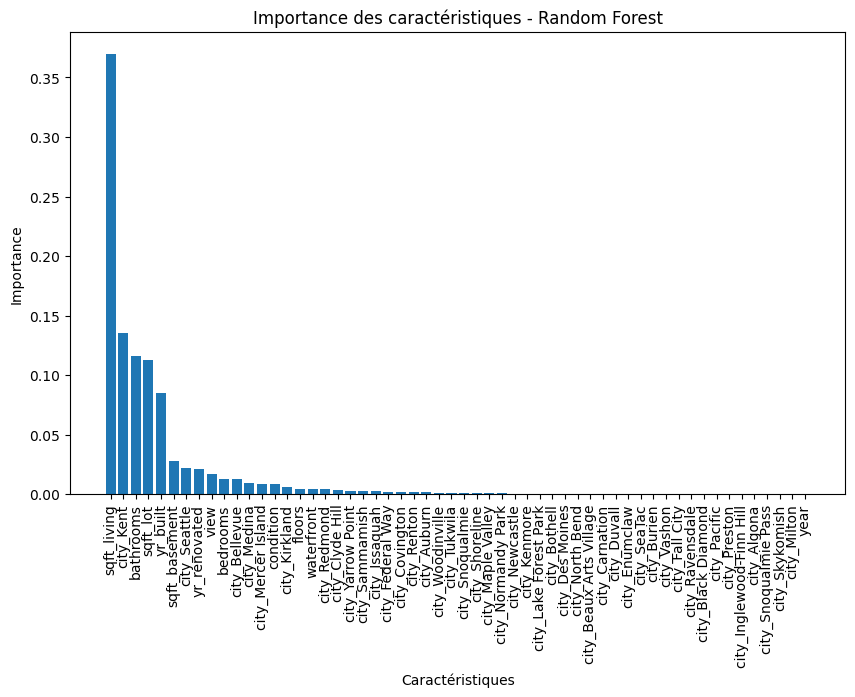

In [81]:
# Obtenez l'importance des caractéristiques du modèle
feature_importances = random_forest_model.feature_importances_
# Obtenez le nom des caractéristiques
feature_names = x.columns
# Triez les indices des caractéristiques par ordre décroissant de leur importance
indices = np.argsort(feature_importances)[::-1]
# Barplot avec les caractéristiques les plus importantes en ordonnées
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), feature_importances[indices])
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.title("Importance des caractéristiques - Random Forest")
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error
# Évaluation de la performance du modèle avec MSE
mse = mean_squared_error(Y_test, predictions)
print("MSE:", mse)

MSE: 0.00020219891947604278


In [83]:
from sklearn.metrics import r2_score

# Évaluation de la performance du modèle avec R²
r2 = r2_score(Y_test, predictions)
print("R²:", r2)

R²: 0.1358885187705714


In [84]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
# Importer les bibliothèques nécessaires

# Appliquer la régularisation Lasso
alpha_value = 0.1  # Vous pouvez ajuster le paramètre alpha selon vos besoins
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train, Y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calculer et afficher les métriques
lasso_rmse = np.sqrt(mean_squared_error(Y_test, lasso_predictions))
lasso_r2_score = r2_score(Y_test, lasso_predictions)

# Ajuster le signe du R2 Score pour le rendre toujours positif
if lasso_r2_score < 0:
    lasso_r2_score *= -1

print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Lasso Regression R2 Score: {lasso_r2_score}")


Lasso Regression RMSE: 0.015304863620522805
Lasso Regression R2 Score: 0.0010364078211142491


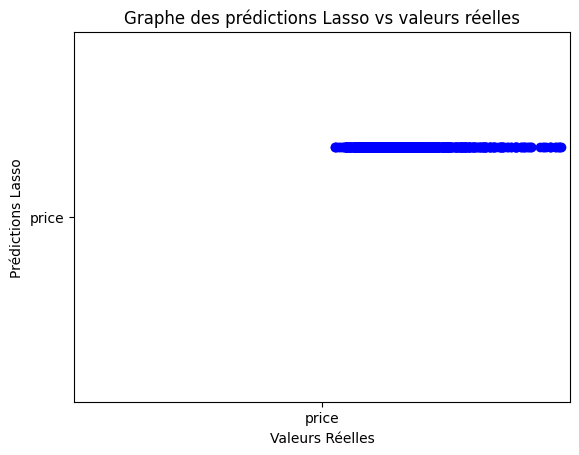

In [85]:
import matplotlib.pyplot as plt

# Supposons que Y_test et lasso_predictions sont vos vraies valeurs et prédictions, respectivement

# Tracer le graphe des prédictions par rapport aux valeurs réelles
plt.scatter(Y_test, lasso_predictions, color='blue', label='Prédictions Lasso')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Ligne de référence')

plt.title('Graphe des prédictions Lasso vs valeurs réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions Lasso')
plt.show()


In [86]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train_poly, Y_train)
ridge_predictions = ridge_model.predict(X_test_poly)
ridge_r2_score = r2_score(Y_test, ridge_predictions)
print(f"Ridge Regression R2 Score: {ridge_r2_score}")

Ridge Regression R2 Score: 0.4997851652776959


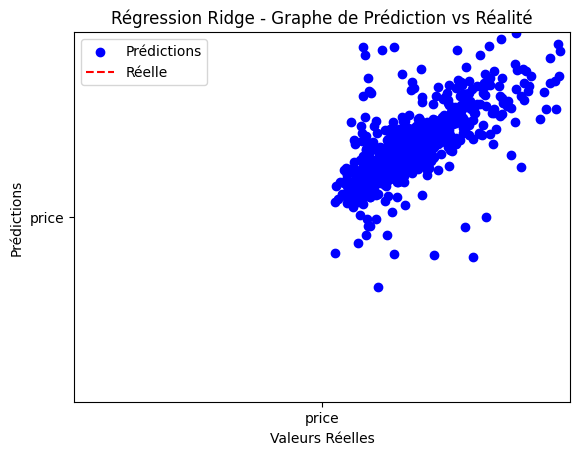

In [87]:
import matplotlib.pyplot as plt

# Tracer les prédictions par rapport aux valeurs réelles
plt.scatter(Y_test, ridge_predictions, color='blue', label='Prédictions')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Réelle')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Régression Ridge - Graphe de Prédiction vs Réalité')
plt.legend()
plt.show()